# Zomato Data Analysis :-

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("ZomatoData.csv")
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [3]:
df.isna().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64

In [4]:
df.duplicated().sum()

0

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


## 1. What `type` of restaurant do the majority of customers order from?

In [7]:
df['listed_in(type)'].value_counts(sort=True)

listed_in(type)
Dining    110
Cafes      23
other       8
Buffet      7
Name: count, dtype: int64

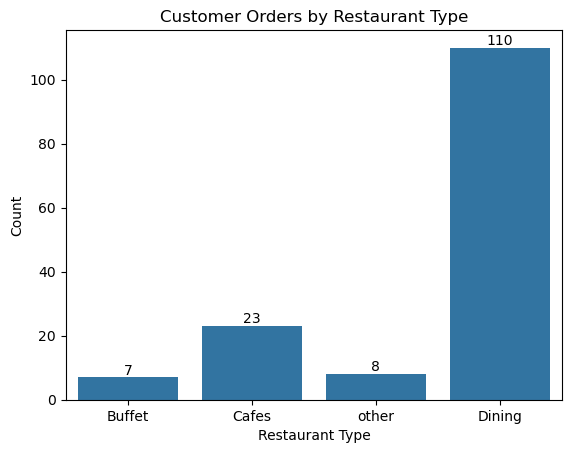

In [62]:
p = sns.countplot(x=df['listed_in(type)'])
p.bar_label(p.containers[0])
p.set(xlabel='Restaurant Type', ylabel='Count')
plt.title("Customer Orders by Restaurant Type")
plt.show()

## Majority of Customers order food from `Dining` type of Restaurants.

## 2. How many `votes` has each `type` of restaurant received from customers?

In [82]:
grouped_votes = df.groupby("listed_in(type)")['votes'].sum()

In [83]:
result = pd.DataFrame({'Votes' : grouped_votes})
result

,Votes
listed_in(type),
Buffet,3028
Cafes,6434
Dining,20363
other,9367


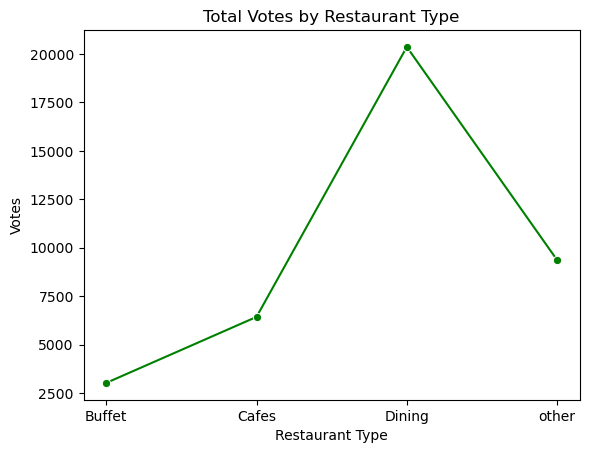

In [99]:
p = sns.lineplot(data=result, x='listed_in(type)', y='Votes', marker='o', color='green')
p.set(xlabel="Restaurant Type", ylabel="Votes")
plt.title("Total Votes by Restaurant Type")
plt.show()

## `Dining` Type Restaurants have got '20363' `Votes` by Customers. i.e., Highest among all
## `Other` Type Restaurants have got '9367' `Votes` by Customers. i.e., Second highest
## `Cafes` Type Restaurants have got '6434' `Votes` by Customers. i.e., Third highest
## `Buffet` Type Restaurants have got '3028' `Votes` by Customers. i.e., Lowest among all

## 3. What are the `ratings` that the majority of restaurants have received?

In [52]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [53]:
def rate_convert(value):
    value = str(value).split('/')
    value = value[0]
    return float(value)

In [54]:
df['rate'] = df['rate'].apply(rate_convert)

In [55]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [100]:
grouped_ratings = df.groupby("listed_in(type)")['rate'].mean().reset_index()
grouped_ratings

,listed_in(type),rate
0,Buffet,3.842857
1,Cafes,3.765217
2,Dining,3.571818
3,other,3.912500


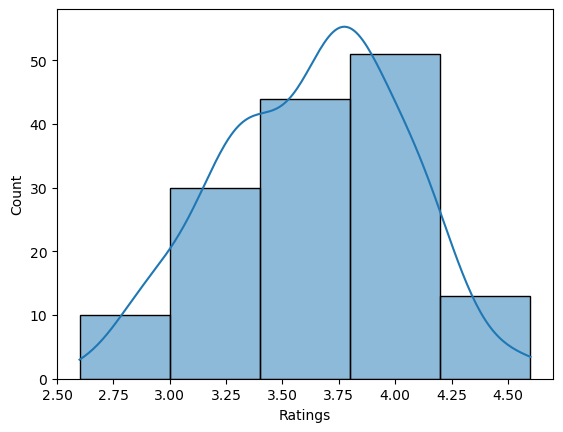

In [105]:
p = sns.histplot(df['rate'], bins=5, kde=True)
p.set(xlabel="Ratings")
plt.show()

## The Majority of Restaurants have received `ratings` between 3.5 and 4. 

## 4. Zomato has observed that most couples order most of their food `online`. What is their average spending on each order?

In [106]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [107]:
grouped_orders = df.groupby("online_order")['approx_cost(for two people)'].mean().reset_index()
grouped_orders

,online_order,approx_cost(for two people)
0,No,358.888889
1,Yes,510.344828


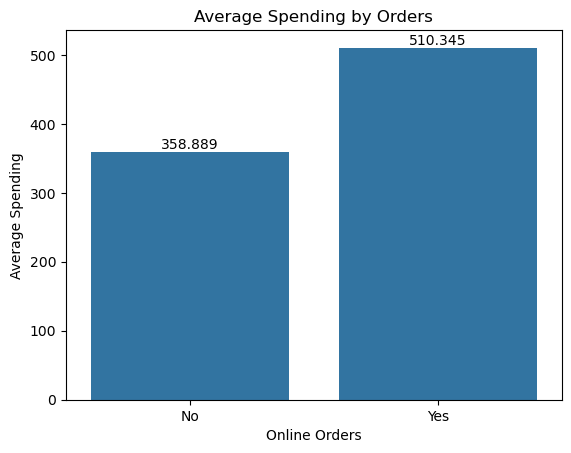

In [113]:
p = sns.barplot(data=grouped_orders, x='online_order', y='approx_cost(for two people)')
p.bar_label(p.containers[0])
p.set(xlabel="Online Orders", ylabel="Average Spending")
plt.title("Average Spending by Orders")
plt.show()

## Most of the couples who order `online`, their average spending is around `Rs.500`. 

## 5. Which `price` range has received the highest `orders`.

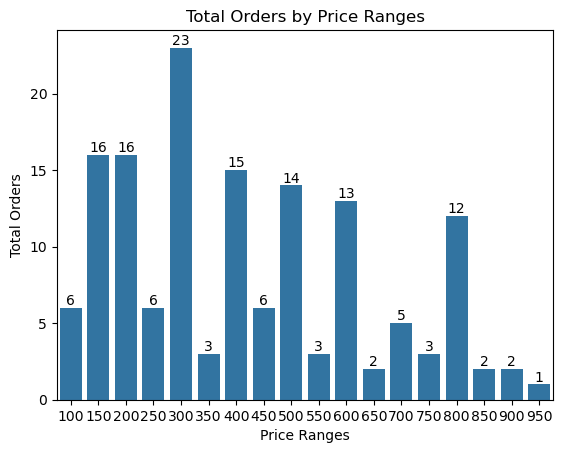

In [117]:
p = sns.countplot(x=df["approx_cost(for two people)"])
p.bar_label(p.containers[0])
p.set(xlabel="Price Ranges", ylabel="Total Orders")
plt.title("Total Orders by Price Ranges")
plt.show()

## The Price range `300` has highest orders i.e., 23 Orders.

## 6. Which mode `(online or offline)` has received the maximum `rating`?

In [118]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [119]:
grouped_maxrating = df.groupby('online_order')['rate'].mean()
grouped_maxrating

online_order
No     3.487778
Yes    3.858621
Name: rate, dtype: float64

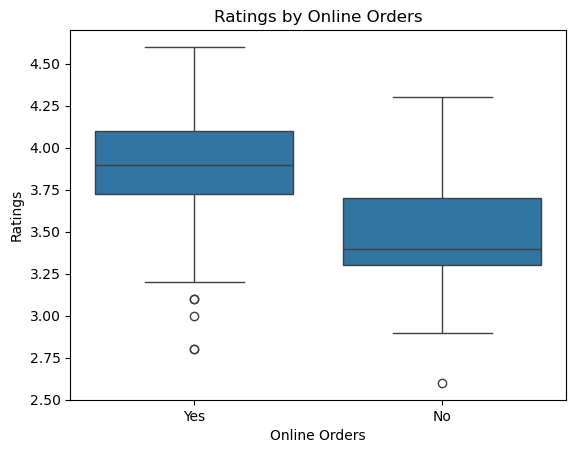

In [122]:
p = sns.boxplot(data=df, x='online_order', y='rate')
p.set(xlabel='Online Orders', ylabel='Ratings')
plt.title("Ratings by Online Orders")
plt.show()

## `Online Order`'s Rating (i.e., 3.85) is Higher as compared to `Offline Order`'s Rating (i.e., 3.48).

## 7. Which type of restaurants received more `offline` orders, so that Zomato can provide customers with some good offers?

In [157]:
pivot_table2 = df.pivot_table(index='listed_in(type)', columns='online_order', values='name', aggfunc='count')
pivot_table2

online_order,No,Yes
listed_in(type),,
Buffet,3,4
Cafes,8,15
Dining,77,33
other,2,6


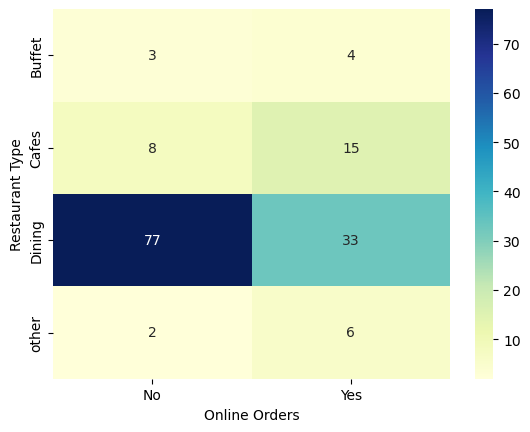

In [159]:
p=sns.heatmap(pivot_table2, annot=True, cmap='YlGnBu')
p.set(xlabel='Online Orders', ylabel='Restaurant Type')

plt.show()

## `Dining` Restaurants type had received more `Offline` orders. (i.e., 77 Orders)